In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures




In [639]:
df = pd.read_csv('housing.csv')

In [640]:
df.shape

(1460, 81)

In [641]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [421]:
df.iloc[:, 0: 10].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub


In [422]:
df.iloc[:, 10: 20].head()

,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000


In [423]:
df.iloc[:, 20: 30].head()

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation
0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc
1,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock
2,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc
3,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil
4,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc


In [424]:
df.iloc[:, 30: 40].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
0,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA
3,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA


In [425]:
df.iloc[:, 40: 50].head()

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2


In [426]:
df.iloc[:, 50: 60].head()

,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0


In [427]:
df.iloc[:, 60: 70].head()

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
0,RFn,2,548,TA,TA,Y,0,61,0,0
1,RFn,2,460,TA,TA,Y,298,0,0,0
2,RFn,2,608,TA,TA,Y,0,42,0,0
3,Unf,3,642,TA,TA,Y,0,35,272,0
4,RFn,3,836,TA,TA,Y,192,84,0,0


In [428]:
df.iloc[:, 70: 85].head()

,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Understanding the target variable distribution

In [430]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

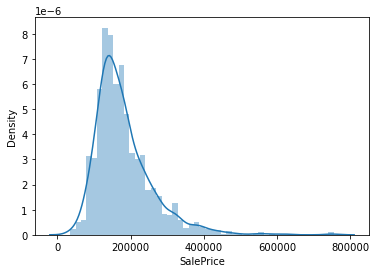

In [431]:
sns.distplot(df.SalePrice)

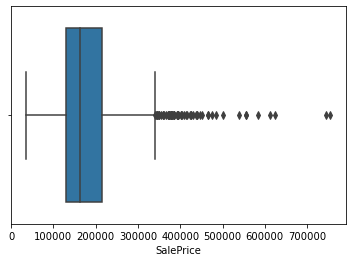

In [432]:
sns.boxplot(x = df.SalePrice)
plt.show()

## Missing Values and Outlier Treatement

In [433]:
#checking total null values
df.isnull().sum().sum()

6965

In [434]:
#checking null values
df.iloc[:, 0: 15].isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
dtype: int64

In [435]:
#checking null values
df.iloc[:, 15: 30].isnull().sum()

BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      8
MasVnrArea      8
ExterQual       0
ExterCond       0
Foundation      0
dtype: int64

In [436]:
#checking null values
df.iloc[:, 30: 45].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
dtype: int64

In [437]:
#checking null values
df.iloc[:, 45: 60].isnull().sum()

LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt      81
dtype: int64

In [438]:
#checking null values
df.iloc[:, 60: 75].isnull().sum()

GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
dtype: int64

In [439]:
#checking null values
df.iloc[:, 75: 81].isnull().sum()

MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [530]:
## Finding missing values in columns as percentage and sorting columns in descending order of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
...,...,...
ExterQual,ExterQual,0.000000
Exterior2nd,Exterior2nd,0.000000
Exterior1st,Exterior1st,0.000000
RoofMatl,RoofMatl,0.000000


In [441]:
missing_value_df.iloc[0:22, :]

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


- ### There are 4 columns containing null values greater than 80% and 1 column with 47% null values. These columns will be dropped from the analysis as these will not add benefit to the analysis. 

- ### Also Id column will be dropped

In [642]:
df = df.drop(columns=['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [532]:
df.shape

(1460, 76)

In [643]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [533]:
## Finding missing values in columns as percentage and sorting columns in descending order of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.iloc[0:20, :]

,column_name,percent_missing
LotFrontage,LotFrontage,17.739726
GarageType,GarageType,5.547945
GarageCond,GarageCond,5.547945
GarageYrBlt,GarageYrBlt,5.547945
GarageFinish,GarageFinish,5.547945
GarageQual,GarageQual,5.547945
BsmtFinType2,BsmtFinType2,2.602740
BsmtExposure,BsmtExposure,2.602740
BsmtFinType1,BsmtFinType1,2.534247
BsmtCond,BsmtCond,2.534247


##### Searching for columns having only one unique value
These columns can be droped because there cannot be any analysis done

In [446]:
df.drop(columns = [c for c in list(df) if len(df[c].unique()) == 1], axis=1, inplace=True)

In [447]:
df.shape

(1460, 76)

No columns with unique values

### Missing Value Imputation for columns with low percentage of missing values

In [534]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [644]:
df.LotFrontage.isnull().sum()

259

Since mean and median are nearly same i.e. 70, replacing null vlaues by 70

In [645]:
df.LotFrontage.fillna(70, inplace=True)

In [646]:
df.LotFrontage.describe()

count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [538]:
## Finding missing values in columns as percentage and sorting columns in descending order of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.iloc[0:20, :]

,column_name,percent_missing
GarageType,GarageType,5.547945
GarageYrBlt,GarageYrBlt,5.547945
GarageFinish,GarageFinish,5.547945
GarageQual,GarageQual,5.547945
GarageCond,GarageCond,5.547945
BsmtExposure,BsmtExposure,2.602740
BsmtFinType2,BsmtFinType2,2.602740
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
BsmtFinType1,BsmtFinType1,2.534247


In [539]:
## Finding types of columns further having missing values
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea',  'MasVnrType',  'Electrical']].info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   GarageFinish  1379 non-null   object 
 3   GarageQual    1379 non-null   object 
 4   BsmtFinType2  1422 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtCond      1423 non-null   object 
 8   BsmtQual      1423 non-null   object 
 9   MasVnrArea    1452 non-null   float64
 10  MasVnrType    1452 non-null   object 
 11  Electrical    1459 non-null   object 
dtypes: float64(2), object(10)
memory usage: 137.0+ KB


In [454]:
## Finding mode of categorical variables for Mode Imputation
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea',  'MasVnrType',  'Electrical']].mode()



,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
0,Attchd,2005.0,Unf,TA,Unf,No,Unf,TA,TA,0.0,None,SBrkr


In [455]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

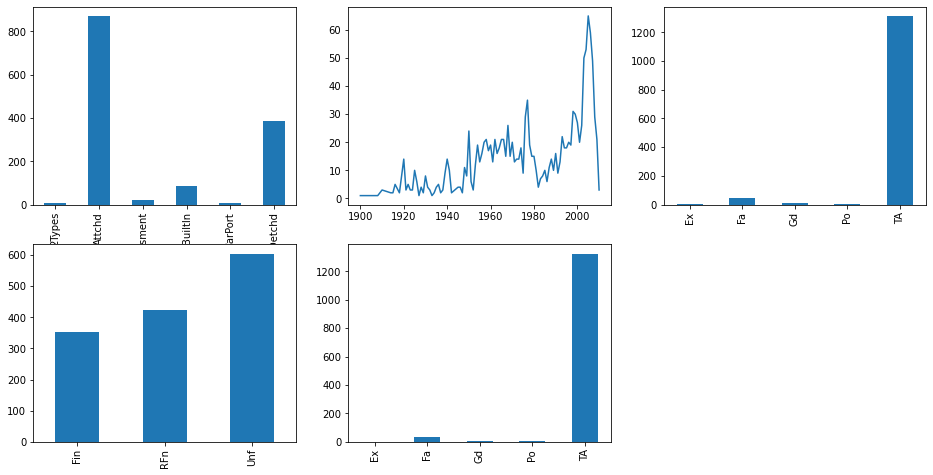

In [647]:
#Finding distribution of Garage Variables
fig, axes = plt.subplots(figsize=(16,8),nrows=2, ncols=2)
plt.subplot(2,3 , 1)
df.GarageType.value_counts().sort_index().plot.bar()
plt.subplot(2,3 , 2)
df.GarageYrBlt.value_counts().sort_index().plot.line()
plt.subplot(2,3 , 3)
df.GarageQual.value_counts().sort_index().plot.bar()
plt.subplot(2,3 , 4)
df.GarageFinish.value_counts().sort_index().plot.bar()
plt.subplot(2,3 , 5)
df.GarageCond.value_counts().sort_index().plot.bar()
plt.show()

In [648]:
## Mode Imputation for Garage Variables
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']] = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].apply(lambda x: x.fillna(x.value_counts().index[0]))


In [649]:
## Finding missing values in columns as percentage and sorting columns in descending order of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.iloc[0:20, :]

,column_name,percent_missing
BsmtFinType2,BsmtFinType2,2.602740
BsmtExposure,BsmtExposure,2.602740
BsmtFinType1,BsmtFinType1,2.534247
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
MasVnrType,MasVnrType,0.547945
MasVnrArea,MasVnrArea,0.547945
Electrical,Electrical,0.068493
HalfBath,HalfBath,0.000000
BedroomAbvGr,BedroomAbvGr,0.000000


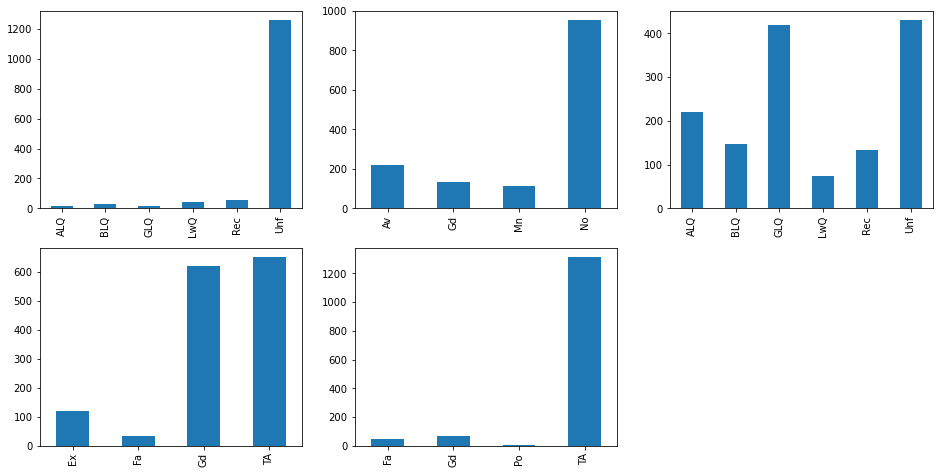

In [459]:
#Finding distribution of BSMNT Variables
fig, axes = plt.subplots(figsize=(16,8),nrows=2, ncols=2)
plt.subplot(2,3 , 1)
df.BsmtFinType2.value_counts().sort_index().plot.bar()
plt.subplot(2,3 , 2)
df.BsmtExposure.value_counts().sort_index().plot.bar()
plt.subplot(2,3 , 3)
df.BsmtFinType1.value_counts().sort_index().plot.bar()
plt.subplot(2,3 , 4)
df.BsmtQual.value_counts().sort_index().plot.bar()
plt.subplot(2,3 , 5)
df.BsmtCond.value_counts().sort_index().plot.bar()
plt.show()

In [650]:
## Mode Imputation for BSMNT Variables
df[['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']] = df[['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']].apply(lambda x: x.fillna(x.value_counts().index[0]))

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.iloc[0:10, :]

,column_name,percent_missing
MasVnrType,MasVnrType,0.547945
MasVnrArea,MasVnrArea,0.547945
Electrical,Electrical,0.068493
BedroomAbvGr,BedroomAbvGr,0.000000
Fireplaces,Fireplaces,0.000000
Functional,Functional,0.000000
TotRmsAbvGrd,TotRmsAbvGrd,0.000000
KitchenQual,KitchenQual,0.000000
KitchenAbvGr,KitchenAbvGr,0.000000
HalfBath,HalfBath,0.000000


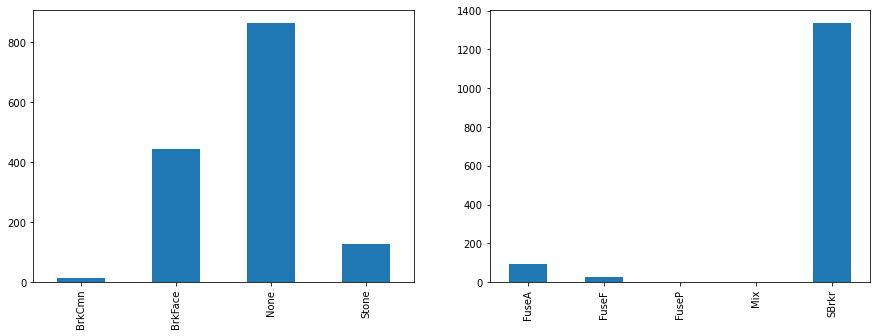

In [543]:
#Finding distribution of MasVnrType and Electrical Variables
fig, axes = plt.subplots(figsize=(15,5),nrows=2, ncols=2)
plt.subplot(1,2 , 1)
df.MasVnrType.value_counts().sort_index().plot.bar()
plt.subplot(1,2 , 2)
df.Electrical.value_counts().sort_index().plot.bar()
plt.show()

In [651]:
## Mode Imputation for MasVnrType and Electrical Variables
df[['MasVnrType', 'Electrical']] = df[['MasVnrType', 'Electrical']].apply(lambda x: x.fillna(x.value_counts().index[0]))

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.iloc[0:10, :]

,column_name,percent_missing
MasVnrArea,MasVnrArea,0.547945
MSSubClass,MSSubClass,0.000000
HalfBath,HalfBath,0.000000
Fireplaces,Fireplaces,0.000000
Functional,Functional,0.000000
TotRmsAbvGrd,TotRmsAbvGrd,0.000000
KitchenQual,KitchenQual,0.000000
KitchenAbvGr,KitchenAbvGr,0.000000
BedroomAbvGr,BedroomAbvGr,0.000000
FullBath,FullBath,0.000000


#### Treating numerical column MasVnrArea for missing values and outliers

In [544]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

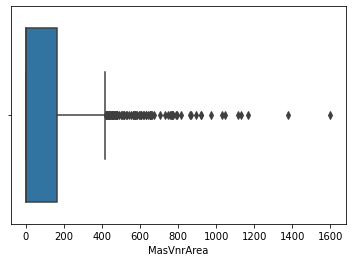

In [545]:

sns.boxplot(x = df.MasVnrArea)
plt.show()

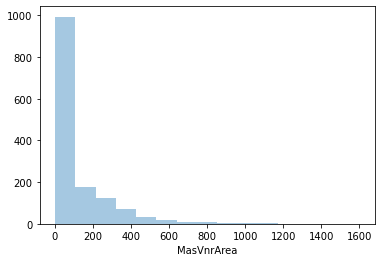

In [546]:
sns.distplot(df.MasVnrArea, bins = 15, kde = False)
plt.show()

In [652]:
# filling missing values with 0 as the most occuring value
df.MasVnrArea.fillna(0, inplace=True)

In [653]:
df.MasVnrArea.describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

#### It can be seen that most of the values are within 0 to 400 range and there are outliers. 
#### Those outliers will be capped to (Q3 + 1.5 * IQR)and the variable will be binned for better representation

In [465]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

From the describe function, we see that Q1 and Q3 percentiles

In [654]:
Q1 = df.MasVnrArea.quantile(.25) 

In [655]:
Q3 = df.MasVnrArea.quantile(.75) 

In [656]:
IQR = Q3- Q1
IQR

164.25

In [657]:
upper_limit = Q3 + 1.5 * IQR
upper_limit

410.625

In [658]:
#Capping outliers to the upper limit (Q3 + 1.5 * IQR) and returning a new column
df['MasVnrArea_N'] = np.where(df.MasVnrArea>upper_limit, upper_limit, df.MasVnrArea)

In [659]:
df['MasVnrArea_N'].describe()

count    1460.000000
mean       89.406336
std       134.017553
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max       410.625000
Name: MasVnrArea_N, dtype: float64

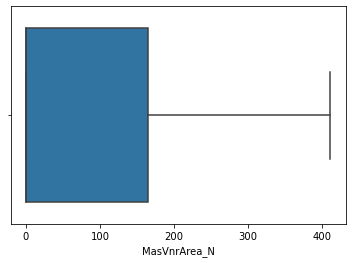

In [660]:
sns.boxplot(x = df.MasVnrArea_N)
plt.show()

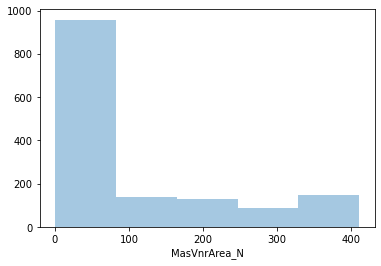

In [661]:
sns.distplot(df.MasVnrArea_N, bins = 5, kde = False)
plt.show()

In [662]:
# binning the new coulmn with labels
bins = [0, 1, 100, 200, 300, 400, 500]
labels =['A_Nil','B_1To100','C_100To200','D_200To300', 'E_300To400', 'G_400+']
df['MasVnrArea_bin'] = pd.cut(df['MasVnrArea_N'], bins,labels=labels, include_lowest=True)

In [663]:
df['MasVnrArea_N'].describe()

count    1460.000000
mean       89.406336
std       134.017553
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max       410.625000
Name: MasVnrArea_N, dtype: float64

In [664]:
df.iloc[0:5, 75:80]

,MasVnrArea_N,MasVnrArea_bin
0,196.0,C_100To200
1,0.0,A_Nil
2,162.0,C_100To200
3,0.0,A_Nil
4,350.0,E_300To400


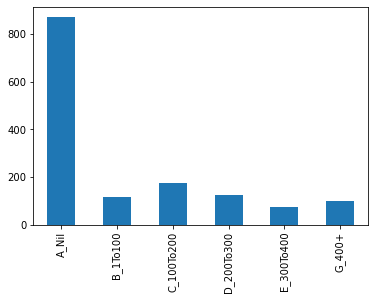

In [665]:
# Distribution of the newly created binned version of MasVnrArea
df.MasVnrArea_bin.value_counts().sort_index().plot.bar()
plt.show()

In [667]:
# Removing column MasVnrArea & MasVnrArea_N 
df = df.drop([ 'MasVnrArea', 'MasVnrArea_N'], axis=1)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

## Univariate and Bivariate Analysis of independent variables

In [668]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

newdf.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. 

**pairwise plot** of numeric variables

In [669]:
# correlation matrix
cor1 = newdf.iloc[:,0:10 ].corr()
cor1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
MSSubClass,1.000000,-0.357042,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759
LotFrontage,-0.357042,1.000000,0.306689,0.234227,-0.052842,0.117555,0.082775,0.215760,0.043298,0.122249
LotArea,-0.139781,0.306689,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618
OverallQual,0.032628,0.234227,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159
OverallCond,-0.059316,-0.052842,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841
YearBuilt,0.027850,0.117555,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040
YearRemodAdd,0.040581,0.082775,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133
BsmtFinSF1,-0.069836,0.215760,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251
BsmtFinSF2,-0.065649,0.043298,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294
BsmtUnfSF,-0.140759,0.122249,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000


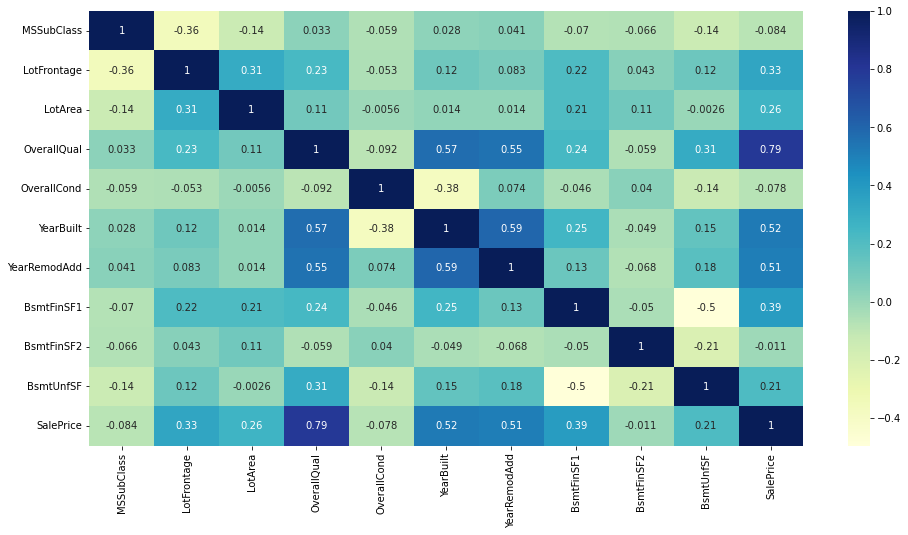

In [671]:
# correlation matrix
cor1 = newdf.iloc[:,np.r_[0:10, 35:36]].corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor1, cmap="YlGnBu", annot=True)
plt.show()



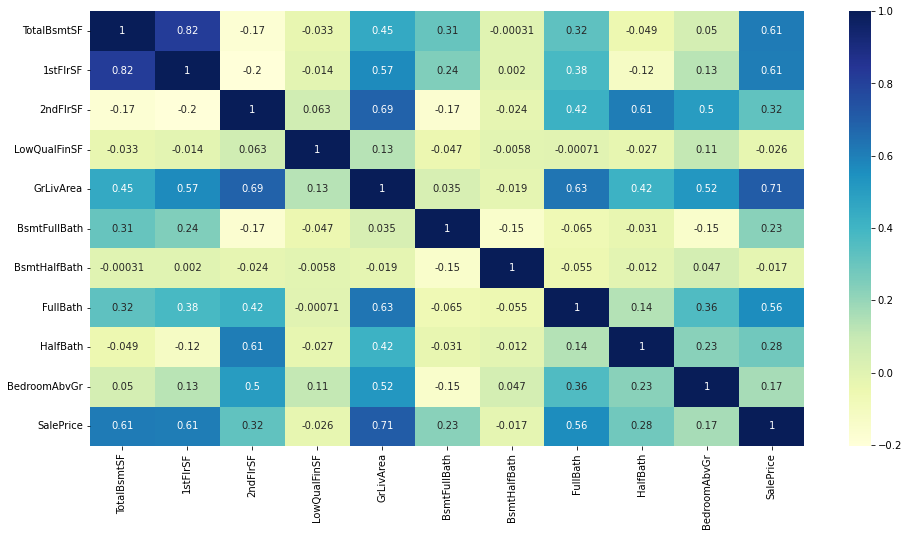

In [672]:
# correlation matrix
cor2 = newdf.iloc[:,np.r_[10:20, 35:36]].corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor2, cmap="YlGnBu", annot=True)
plt.show()




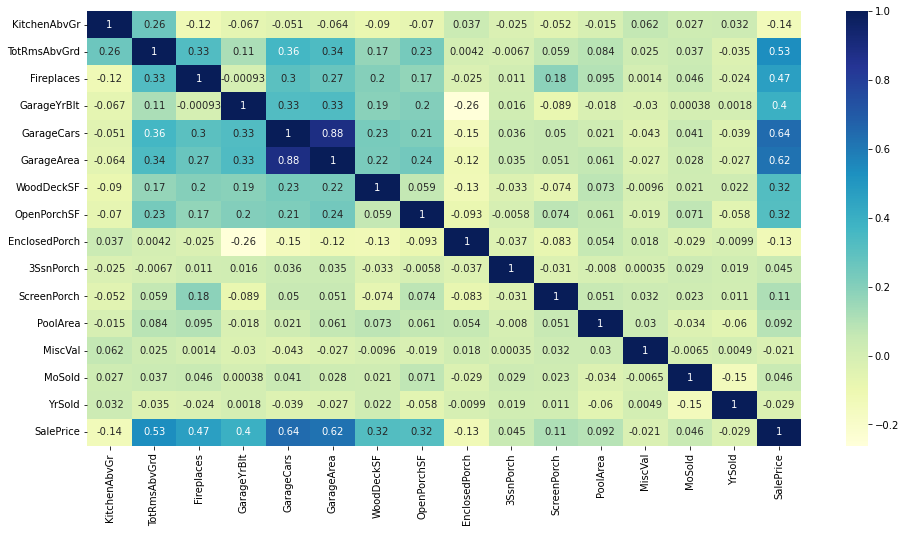

In [673]:
# correlation matrix
cor3 = newdf.iloc[:,20:36].corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor3, cmap="YlGnBu", annot=True)
plt.show()

Correlation of price with independent variables

- SalesPrice is highly correlated to OverallQual, YearBuil, YearRemodAdded, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, GarageCars and GarageArea

Correlation among independent variables:
- Many independent variables are highly correlated 

Multicollinearity need to be factored in

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSSubClass      1460 non-null   int64   
 1   MSZoning        1460 non-null   object  
 2   LotFrontage     1460 non-null   float64 
 3   LotArea         1460 non-null   int64   
 4   Street          1460 non-null   object  
 5   LotShape        1460 non-null   object  
 6   LandContour     1460 non-null   object  
 7   Utilities       1460 non-null   object  
 8   LotConfig       1460 non-null   object  
 9   LandSlope       1460 non-null   object  
 10  Neighborhood    1460 non-null   object  
 11  Condition1      1460 non-null   object  
 12  Condition2      1460 non-null   object  
 13  BldgType        1460 non-null   object  
 14  HouseStyle      1460 non-null   object  
 15  OverallQual     1460 non-null   int64   
 16  OverallCond     1460 non-null   int64   
 17  YearBuilt     

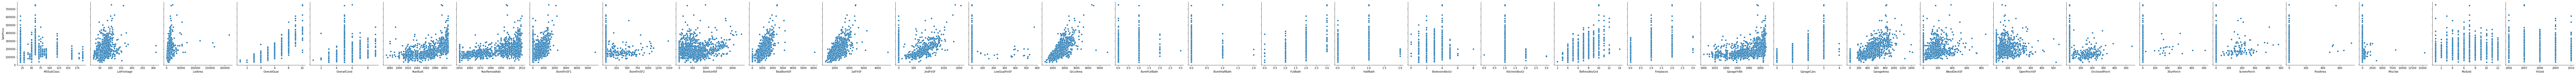

In [675]:
# Scatter plot for numerical variables
sns.pairplot(df, x_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

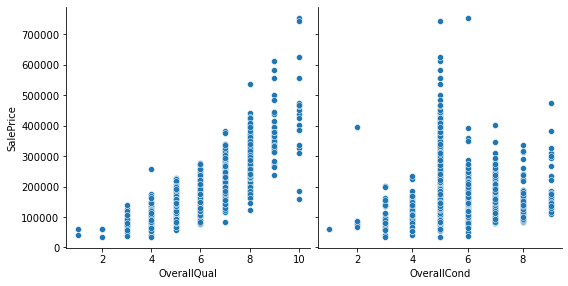

In [569]:
# Scatter plot for numerical variables 'OverallQual','OverallCond'
sns.pairplot(df, x_vars=[ 'OverallQual',
       'OverallCond'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

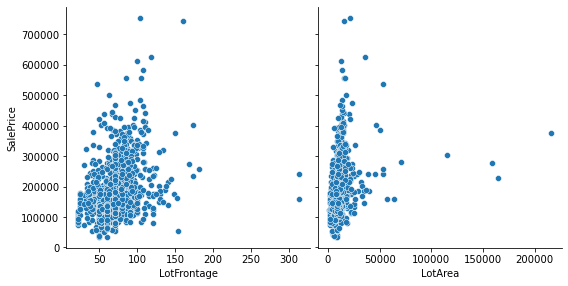

In [570]:
# Scatter plot for numerical variables 'LotFrontage', 'LotArea'
sns.pairplot(df, x_vars=['LotFrontage', 'LotArea'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

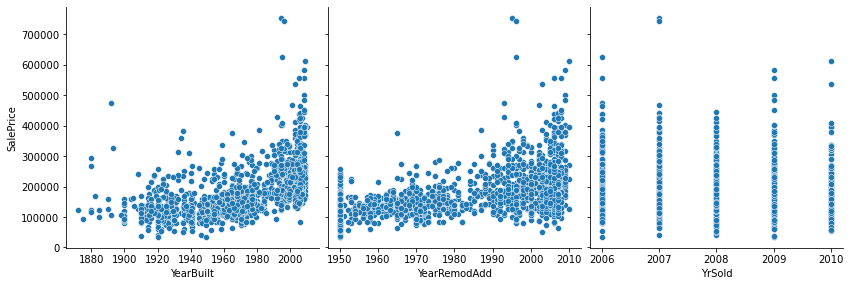

In [571]:
# Scatter plot for numerical variables
sns.pairplot(df, x_vars=['YearBuilt', 'YearRemodAdd', 'YrSold'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

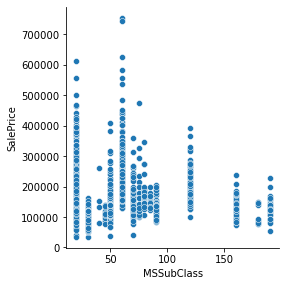

In [572]:
# Scatter plot for numerical variables
sns.pairplot(df, x_vars=['MSSubClass'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

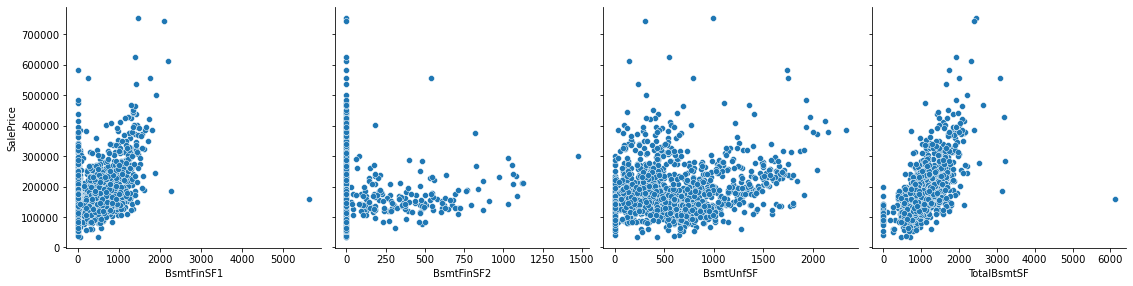

In [573]:
# Scatter plot for numerical variables
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

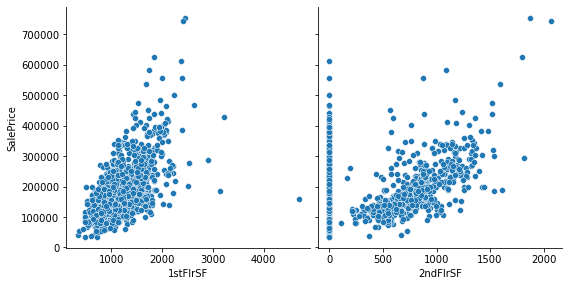

In [574]:
# Scatter plot for numerical variables
sns.pairplot(df, x_vars=['1stFlrSF', '2ndFlrSF'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

In [575]:
df['2ndFlrSF'].describe()

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

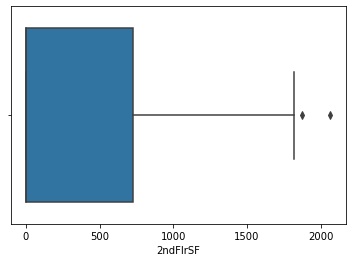

In [576]:
sns.boxplot(x = df['2ndFlrSF'])
plt.show()

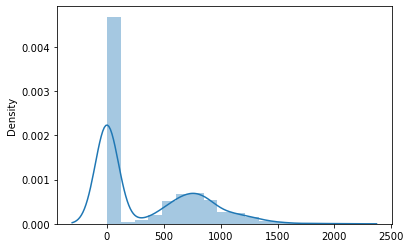

In [577]:
sns.distplot(x = df['2ndFlrSF'])
plt.show()

In [676]:
# converting OverallQual, OverallCond, MSSubClass to categorical
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
#df['YrSold'] = cars['YrSold'].astype('object')
df['MSSubClass'] = df['MSSubClass'].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSSubClass      1460 non-null   object  
 1   MSZoning        1460 non-null   object  
 2   LotFrontage     1460 non-null   float64 
 3   LotArea         1460 non-null   int64   
 4   Street          1460 non-null   object  
 5   LotShape        1460 non-null   object  
 6   LandContour     1460 non-null   object  
 7   Utilities       1460 non-null   object  
 8   LotConfig       1460 non-null   object  
 9   LandSlope       1460 non-null   object  
 10  Neighborhood    1460 non-null   object  
 11  Condition1      1460 non-null   object  
 12  Condition2      1460 non-null   object  
 13  BldgType        1460 non-null   object  
 14  HouseStyle      1460 non-null   object  
 15  OverallQual     1460 non-null   object  
 16  OverallCond     1460 non-null   object  
 17  YearBuilt     

In [678]:
objects = ['object']

newdf_o = df.select_dtypes(include=objects)

newdf_o.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [679]:
ObjList = newdf_o.columns
ObjList

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

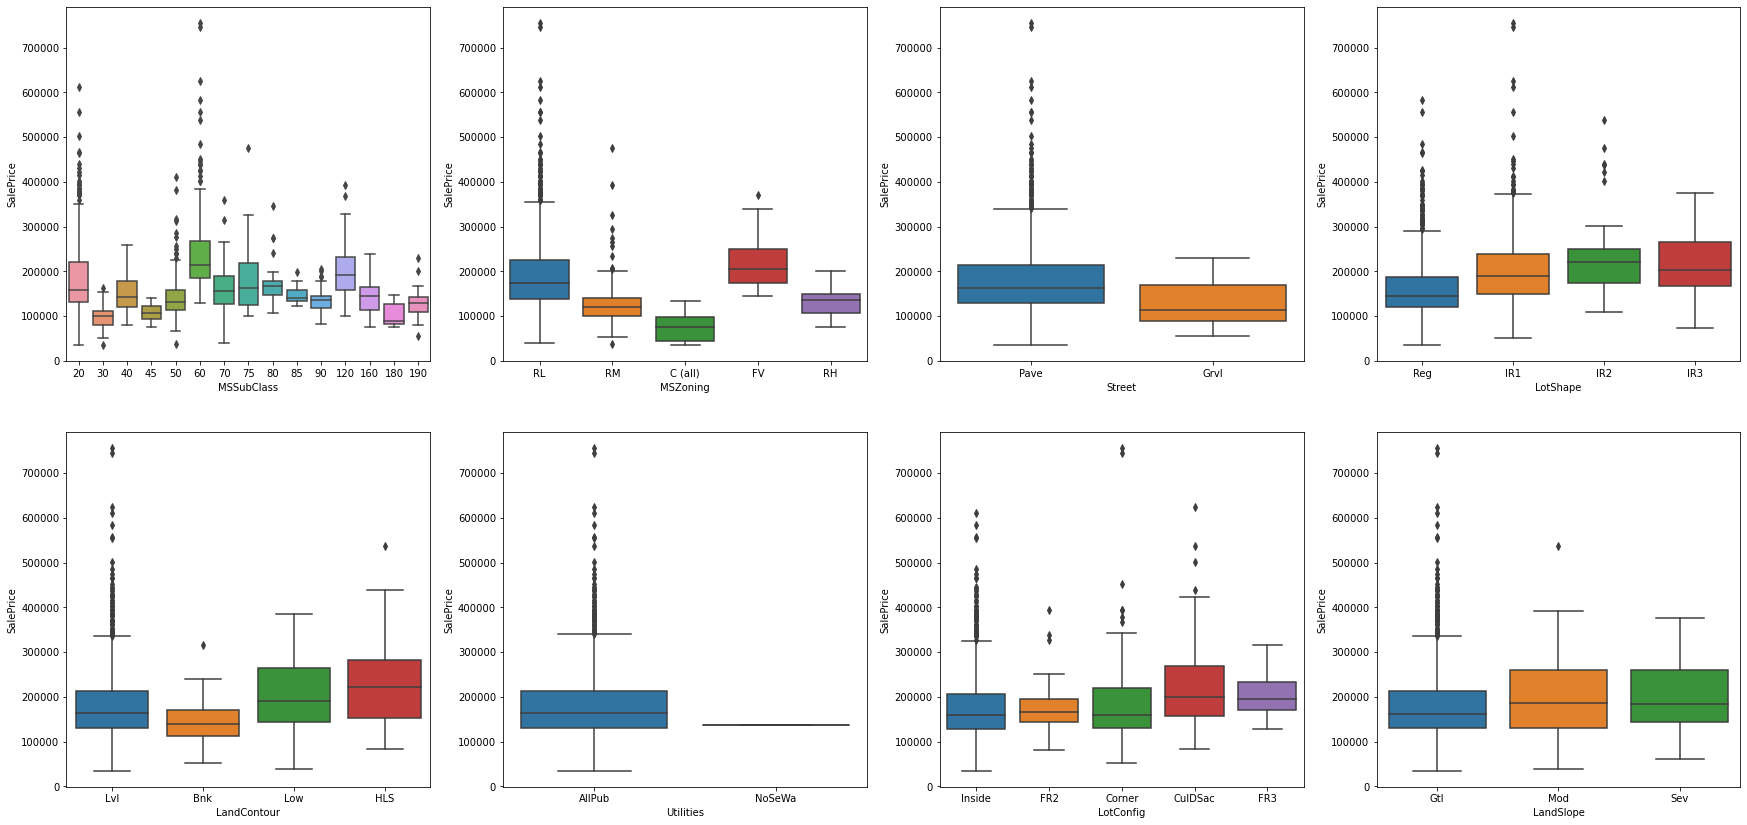

In [581]:
plt.figure(figsize = (30,30))

for i in range(1,9):
        plt.subplot(4,4,i)
        sns.boxplot(x = ObjList[i-1], y = 'SalePrice', data = df)



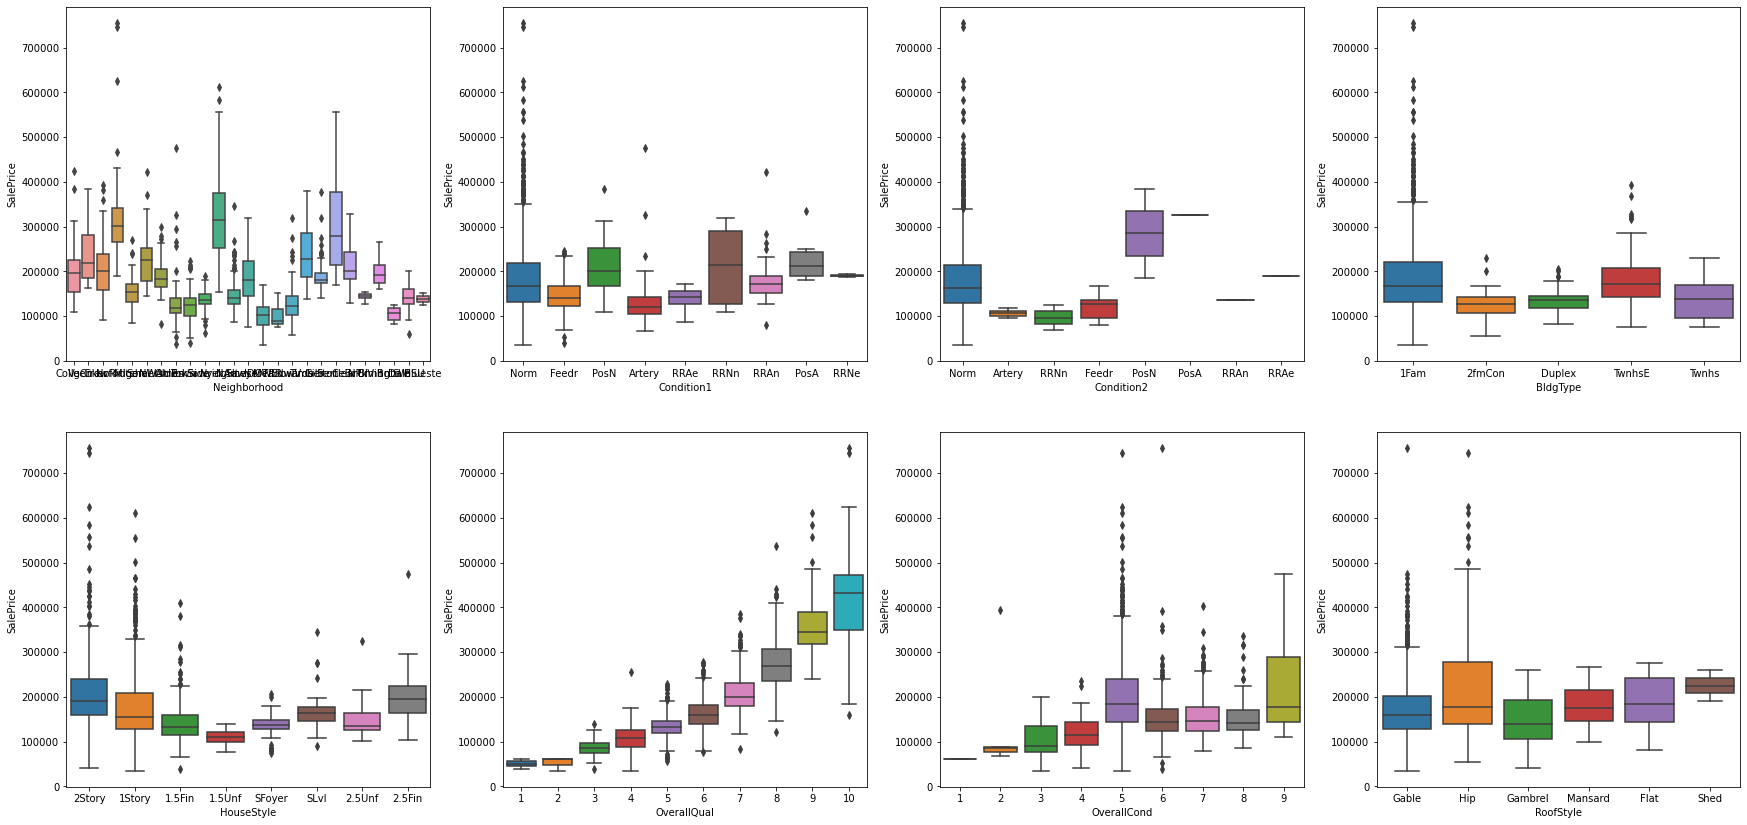

In [582]:
plt.figure(figsize = (30,30))

for i in range(1,9):
        plt.subplot(4,4,i)
        sns.boxplot(x = ObjList[i+7], y = 'SalePrice', data = df)


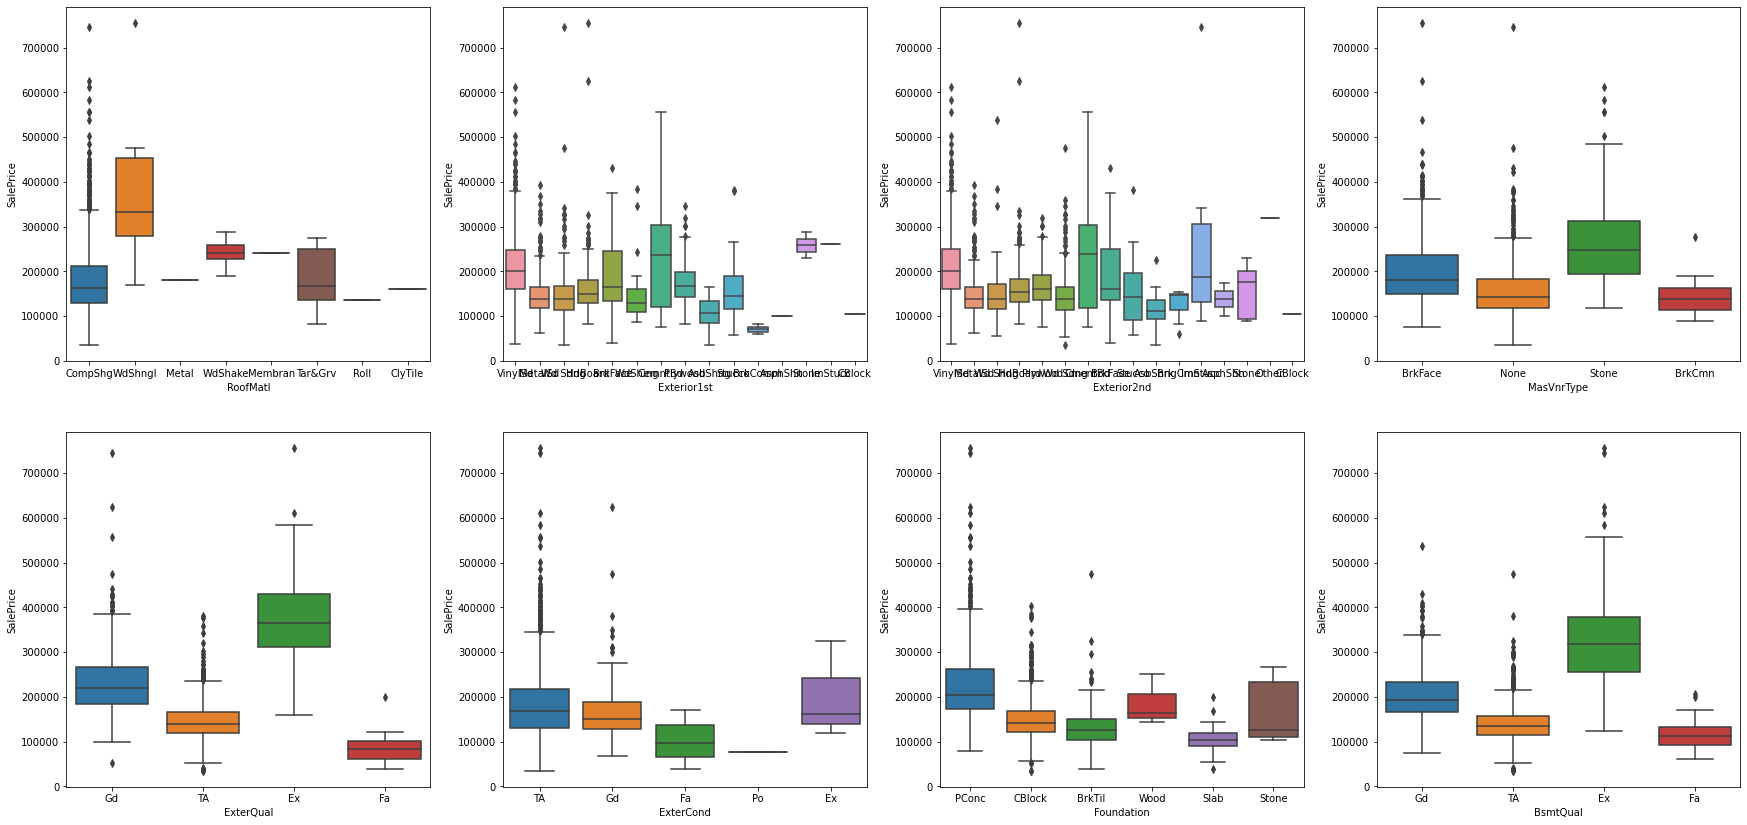

In [583]:
plt.figure(figsize = (30,30))

for i in range(1,9):
        plt.subplot(4,4,i)
        sns.boxplot(x = ObjList[i+15], y = 'SalePrice', data = df)

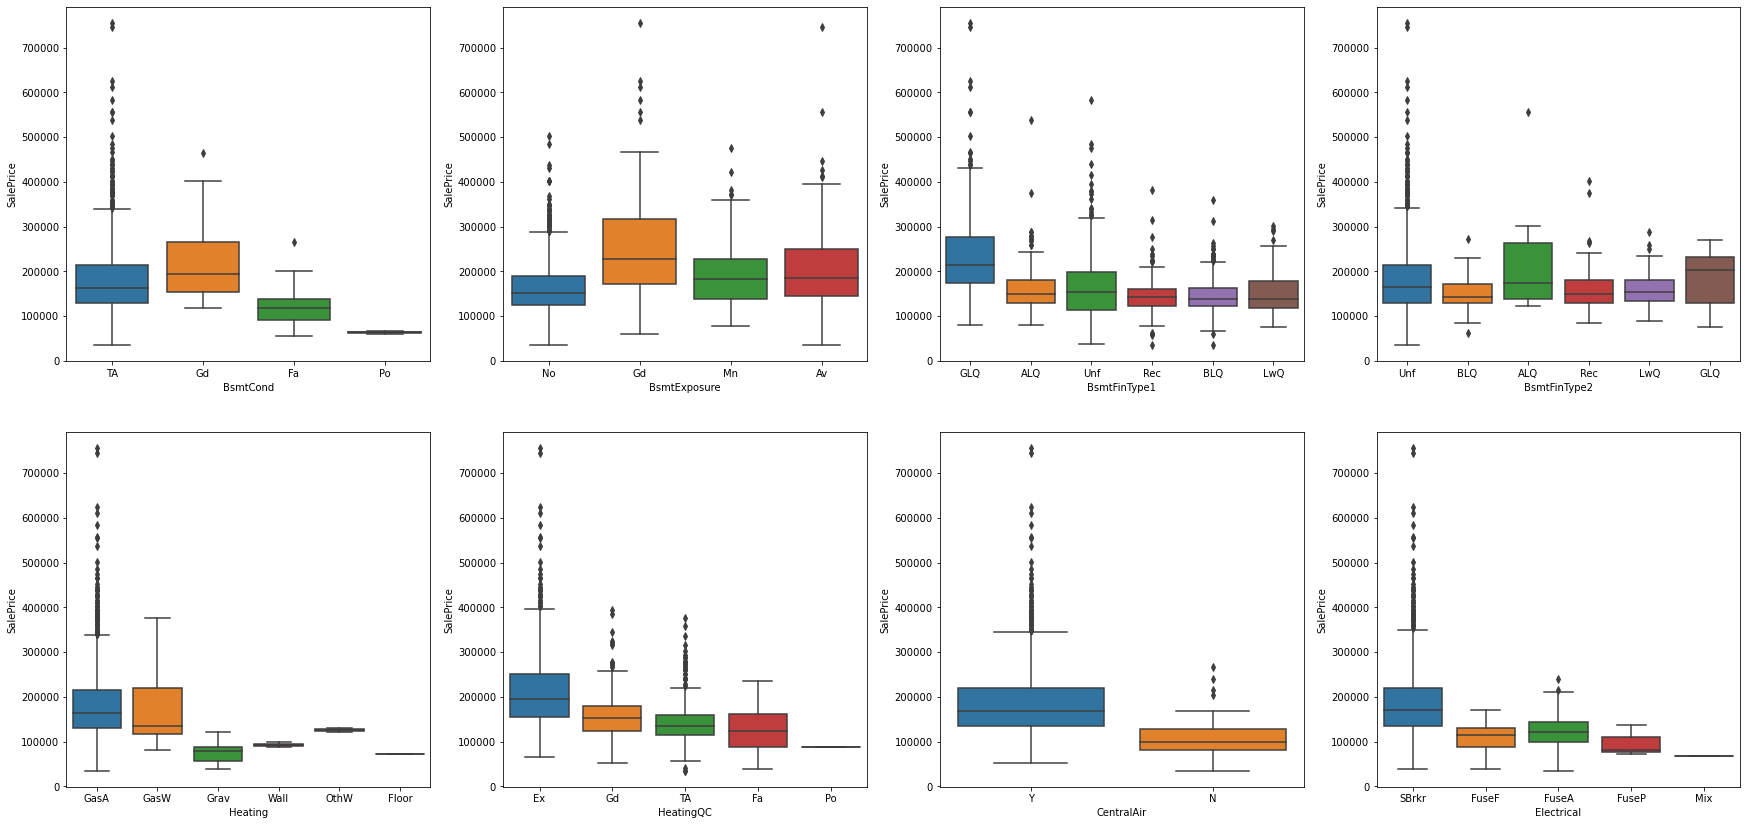

In [584]:
plt.figure(figsize = (30,30))

for i in range(1,9):
        plt.subplot(4,4,i)
        sns.boxplot(x = ObjList[i+23], y = 'SalePrice', data = df)

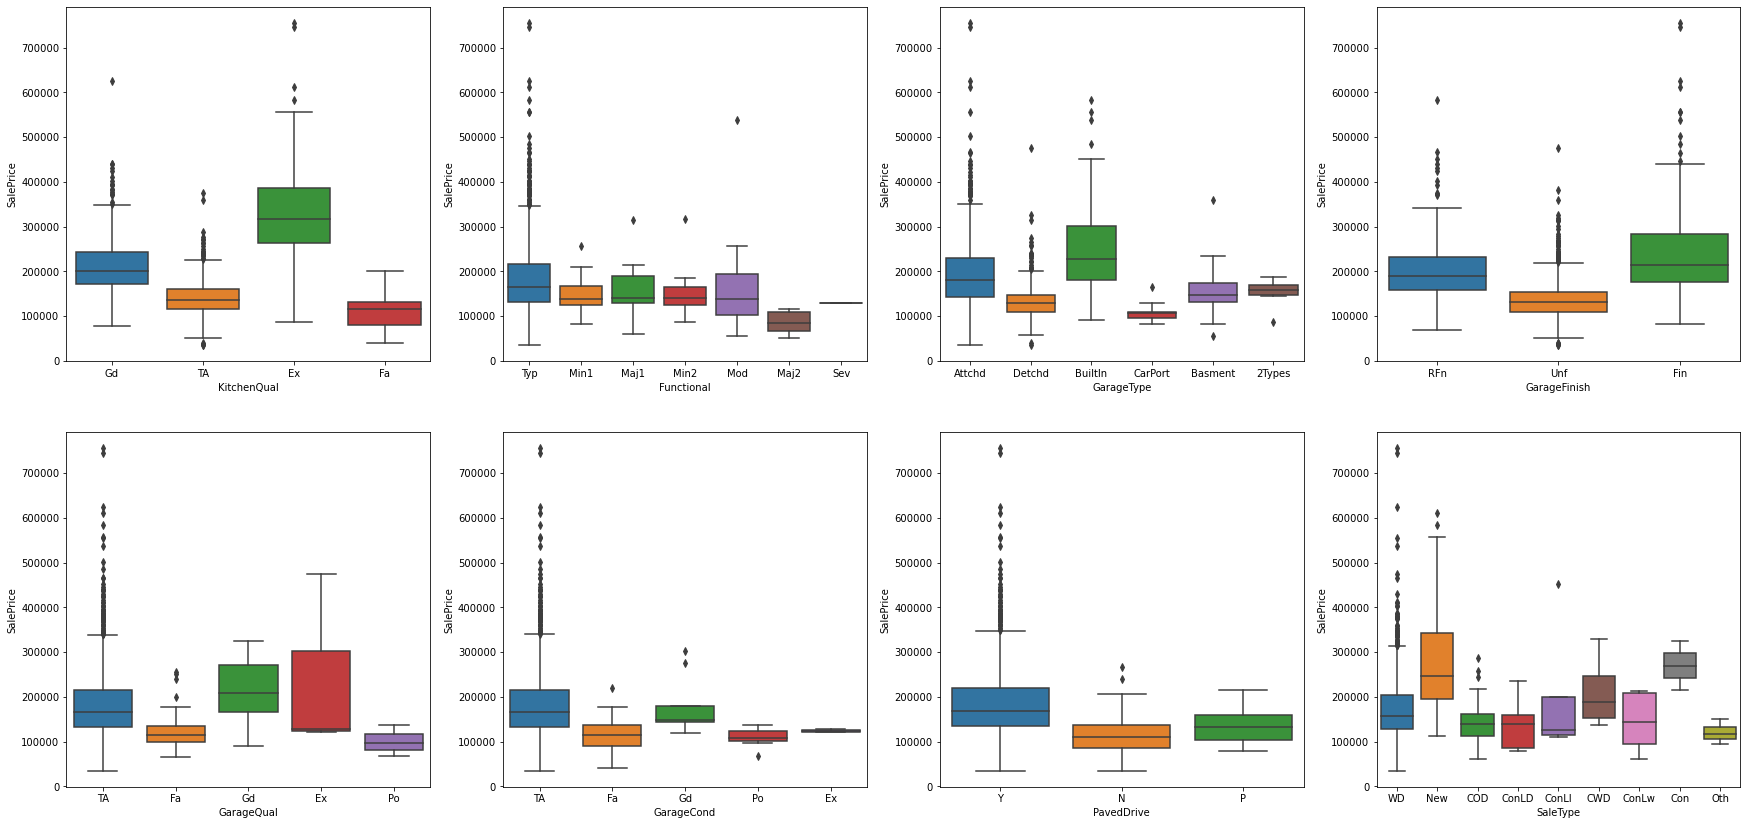

In [585]:
plt.figure(figsize = (30,30))

for i in range(1,9):
        plt.subplot(4,4,i)
        sns.boxplot(x = ObjList[i+31], y = 'SalePrice', data = df)

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

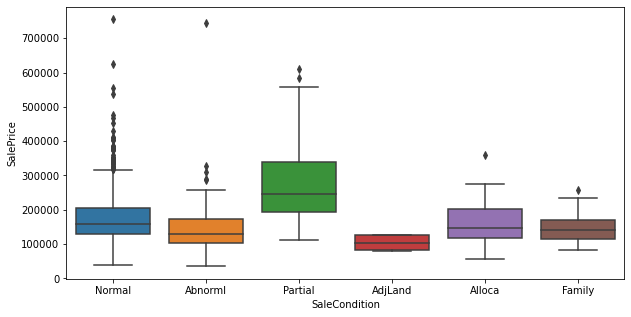

In [586]:
plt.figure(figsize = (10,5))
sns.boxplot(x = ObjList[40], y = 'SalePrice', data = df)

## Data Preparation

In [694]:
# split into X and y

X = df.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'MasVnrArea_bin']] # predictors in variable X


y = df['SalePrice']  # response variable in Y

In [681]:
df[['MasVnrArea_bin']].isnull().sum()

MasVnrArea_bin    0
dtype: int64

In [682]:
df[['MasVnrArea_bin']].value_counts()

MasVnrArea_bin
A_Nil             871
C_100To200        174
D_200To300        126
B_1To100          117
G_400+            100
E_300To400         72
dtype: int64

In [691]:
df['MasVnrArea_bin'] = df['MasVnrArea_bin'].astype('object')

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   object 
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   object 
 16  OverallCond     1460 non-null   object 
 17  YearBuilt       1460 non-null   i

In [696]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()



,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MasVnrArea_bin
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,C_100To200
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,A_Nil
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,C_100To200
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,A_Nil
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,E_300To400


In [697]:
df_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition', 'MasVnrArea_bin'],
      dtype='object')

In [698]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.columns

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'MasVnrArea_bin_B_1To100', 'MasVnrArea_bin_C_100To200',
       'MasVnrArea_bin_D_200To300', 'MasVnrArea_bin_E_300To400',
       'MasVnrArea_bin_G_400+'],
      dtype='object', length=232)

In [699]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [700]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [701]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'MasVnrArea_bin_B_1To100', 'MasVnrArea_bin_C_100To200',
       'MasVnrArea_bin_D_200To300', 'MasVnrArea_bin_E_300To400',
       'MasVnrArea_bin_G_400+'],
      dtype='object', length=264)

In [702]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

## Linear Regression

In [703]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [704]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

5180733684574.867
[ 2.07226442e+03  6.60972521e+03  1.31635942e+04  1.78808413e+03
  3.88653266e+13  1.37464426e+13  3.76526539e+13 -3.73832429e+13
  2.10698990e+14  2.37917791e+14  2.65006702e+13 -2.86398597e+14
  6.52989258e+02 -2.21951172e+02  1.13542188e+03 -1.59793750e+03
 -1.55461719e+03 -3.46206250e+03 -1.15237012e+03  1.30308984e+03
  1.63489453e+03  2.44582471e+03  1.98560742e+03  4.93000000e+02
  1.81366406e+03  7.04344727e+02  1.38600586e+03  1.30122852e+03
  3.36584375e+03  5.56892578e+02 -8.39701538e+02 -5.14280762e+02
  5.44976562e+02  4.24199219e+02 -9.42453125e+02 -1.28481641e+03
  1.93191406e+03  1.01016797e+03 -3.88682910e+03 -4.71450684e+02
 -1.11687500e+03 -8.02466281e+11 -1.56598633e+02 -1.61119141e+02
  1.15576172e+01  5.67568436e+13  8.46694141e+03  4.47075879e+03
  1.77481016e+04  1.34723105e+04  1.55161377e+03  3.63869141e+02
  3.82380859e+02  4.35984375e+02 -7.46992188e+01 -6.50000000e+02
  1.35675439e+03 -3.50784180e+02  1.80528516e+03 -1.21415625e+03
  6.269

In [705]:
from sklearn.metrics import r2_score, mean_squared_error

In [706]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9566787804026868
-1.7809228988188877e+19
276419653876.45825
5.019909690488614e+31
270734234.94266236
1.1460981028512817e+29


## Ridge and Lasso Regression

## Ridge Regression

In [707]:
from sklearn.model_selection import GridSearchCV

In [708]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [709]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [710]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.91264694e+02  2.69015784e+03  1.97967713e+03  3.04410682e+03
  2.15933738e+03  8.32065086e+02  8.92679332e+02  3.45002261e+03
  5.33182782e+03  4.68804836e+03 -5.11136988e+02  7.76971462e+03
  2.39081601e+03  2.23351060e+02  4.18594141e+03  1.86789582e+03
  5.90339993e+02 -1.92113749e+03  4.03526652e+03  3.85800942e+03
  7.92034681e+02  4.47766149e+03  2.95594919e+03  1.62433679e+03
  8.70554490e+02  1.51000507e+02  1.17381435e+03  1.39188066e+03
 -3.44123660e+02  8.22853178e+01 -2.49857607e+02 -5.34537669e+02
 -9.40933078e+02  1.76759790e+02  1.75805084e+01  3.02443882e+02
  5.97294652e+02  8.30349961e+02  3.38122149e+02 -8.11234368e+02
 -4.08344822e+02 -9.04759127e+02 -1.41001561e+03 -1.47736262e+03
 -6.65164543e+02 -9.69689652e+02  7.13619480e+02  2.24122799e+02
  1.22181923e+03 -7.96758384e+02  6.98423103e+02  4.30800234e+02
 -2.09047524e+03 -4.75143662e+02  1.10714011e+03  5.49492220e+02
  1.55010121e+03 -8.71496746e+02  2.03121055e+03 -1.16200620e+03
 -2.49127827e+02 -4.42916

In [711]:
# Calculating metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8936541296769573
0.8628477332016601
678560967099.5818
386592812990.4309
664604277.2767696
882631993.1288377


## Lasso

In [712]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [713]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [714]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [715]:
lasso.coef_

array([-0.00000000e+00,  3.99402831e+03,  8.63981665e+03,  3.67831386e+03,
        2.15976829e+03,  0.00000000e+00, -0.00000000e+00,  3.38845614e+03,
        0.00000000e+00,  0.00000000e+00, -1.98459263e+03,  3.04794086e+04,
        2.79167331e+03,  0.00000000e+00,  2.28416204e+03,  0.00000000e+00,
       -3.95026059e+02, -4.47291538e+03,  0.00000000e+00,  2.16133599e+03,
        0.00000000e+00,  5.70088844e+03,  0.00000000e+00,  3.01453060e+02,
        1.70989621e+02,  0.00000000e+00,  9.44396939e+02,  1.08536398e+03,
       -0.00000000e+00,  0.00000000e+00, -9.01682725e+01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -6.03799345e+01, -0.00000000e+00,
       -0.00000000e+00, -2.90848265e+02, -0.00000000e+00, -4.56091526e+02,
       -0.00000000e+00, -7.74777277e+02,  0.00000000e+00,  0.00000000e+00,
        1.23900136e+03, -0.00000000e+00,  9.69486590e+02,  5.69428584e+01,
       -1.10906163e+03, -

In [716]:
# Calculating some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9326951792170936
0.8465836749451139
429451789168.51013
432436517792.5054
420618794.484339
987297985.8276378


In [717]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.566788e-01,8.936541e-01,9.326952e-01
1,R2 Score (Test),-1.780923e+19,8.628477e-01,8.465837e-01
2,RSS (Train),2.764197e+11,6.785610e+11,4.294518e+11
3,RSS (Test),5.019910e+31,3.865928e+11,4.324365e+11
4,MSE (Train),1.645400e+04,2.577992e+04,2.050899e+04
5,MSE (Test),3.385407e+14,2.970912e+04,3.142130e+04


- ### R-Squared of -infinity on the test data compared to 95% on the train data shows the model is overfitted using Linear regression and we cannot consider this model

- ### R-Squared of 86% on the test data compared to 89% on the train data shows the model predicted well on the test set using Ridge Regression. Hence the model is a pretty good model.

- ### R-Squared of 84% on the test data compared to 93% on the train data shows that there was a slight overfitting however the model predicted well on the test set using Lasso Regression. Hence the model is also good but not as good as model using Ridge Regression.

## Lets observe the changes in the coefficients after regularization

In [718]:
betas = pd.DataFrame(index=X.columns)

In [719]:
betas.rows = X.columns

In [720]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [721]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,2.072264e+03,291.264694,-0.000000
LotArea,6.609725e+03,2690.157836,3994.028311
YearBuilt,1.316359e+04,1979.677133,8639.816654
YearRemodAdd,1.788084e+03,3044.106823,3678.313859
BsmtFinSF1,3.886533e+13,2159.337376,2159.768286
BsmtFinSF2,1.374644e+13,832.065086,0.000000
BsmtUnfSF,3.765265e+13,892.679332,-0.000000
TotalBsmtSF,-3.738324e+13,3450.022608,3388.456141
1stFlrSF,2.106990e+14,5331.827818,0.000000
2ndFlrSF,2.379178e+14,4688.048356,0.000000


### Residual analysis using Ridge model output

Text(0.5, 0, 'Errors')

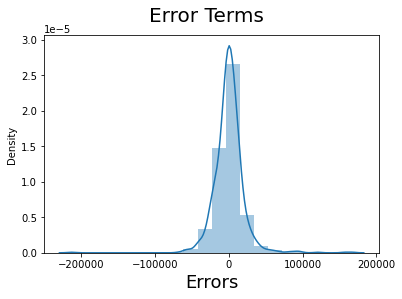

In [638]:
#plotting histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### <span style= 'background:yellow'> Error terms a normally distributed and centered around 0. 

In [722]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 9.06559901e+02  2.26424384e+03  1.69799964e+03  2.72565163e+03
  2.36374988e+03  6.22800353e+02  9.54942114e+02  3.64830054e+03
  4.83809257e+03  3.54884493e+03 -3.85456774e+02  6.47174852e+03
  2.01745659e+03  1.66962200e+02  3.59093706e+03  1.83577252e+03
  8.11649376e+02 -1.50496956e+03  3.91081306e+03  3.77270207e+03
  8.77841225e+02  4.03175111e+03  3.34328033e+03  1.82735442e+03
  9.92019198e+02  5.47789818e+01  9.22579911e+02  1.18640029e+03
 -9.01821456e+00  1.87349478e+01 -1.28323707e+02 -4.01008531e+02
 -9.91501592e+02  1.75424559e+02  1.02799494e+00  2.37852235e+02
  1.09703045e+03  7.78522119e+02  2.34645394e+02 -6.98412803e+02
 -3.88124093e+02 -8.45802705e+02 -9.71412320e+02 -1.25743901e+03
 -5.94828280e+02 -7.96051970e+02  5.55512835e+02  7.74537719e+01
  1.10349541e+03 -1.00350399e+03  5.55058383e+02  4.51632493e+02
 -1.62445102e+03 -7.54619838e+02  9.32786782e+02  4.59054778e+02
  8.61323089e+02 -7.07290284e+02  1.69777207e+03 -8.49541979e+02
 -1.96760570e+02 -3.90040

In [723]:
# Calculating metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8703196362208144
0.8516962347311401
827451341481.5986
418025681461.468
810432263.9388821
954396533.0170503


In [733]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [725]:
# Calculating some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8991443075598894
0.8420896624950751
643529795673.042
445103846996.97986
630293629.4544976
1016218828.760228


In [726]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.566788e-01,8.703196e-01,8.991443e-01
1,R2 Score (Test),-1.780923e+19,8.516962e-01,8.420897e-01
2,RSS (Train),2.764197e+11,8.274513e+11,6.435298e+11
3,RSS (Test),5.019910e+31,4.180257e+11,4.451038e+11
4,MSE (Train),1.645400e+04,2.846809e+04,2.510565e+04
5,MSE (Test),3.385407e+14,3.089331e+04,3.187819e+04


In [727]:
betas = pd.DataFrame(index=X.columns)

In [728]:
betas.rows = X.columns

In [729]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso2'] = lasso.coef_

In [730]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,2.072264e+03,906.559901,-0.000000
LotArea,6.609725e+03,2264.243845,3328.227117
YearBuilt,1.316359e+04,1697.999641,6068.881508
YearRemodAdd,1.788084e+03,2725.651626,4431.924376
BsmtFinSF1,3.886533e+13,2363.749878,0.000000
BsmtFinSF2,1.374644e+13,622.800353,0.000000
BsmtUnfSF,3.765265e+13,954.942114,0.000000
TotalBsmtSF,-3.738324e+13,3648.300538,1536.977764
1stFlrSF,2.106990e+14,4838.092567,0.000000
2ndFlrSF,2.379178e+14,3548.844928,0.000000


In [734]:
# split into X and y

X = df.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'MasVnrArea_bin']] # predictors in variable X


y = df['SalePrice']  # response variable in Y

In [735]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()



df_categorical.columns

# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.columns

# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [736]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 500}


In [739]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

# Calculating some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

betas = pd.DataFrame(index=X.columns)

betas.rows = X.columns

#betas['Linear'] = lm.coef_
#betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(68)

0.9289857206103516
0.8437684350411851
453120727247.25854
440371869785.6515
443800908.17557156
1005415227.8211222


,Lasso
LotFrontage,0.000000
BsmtFinSF1,1929.708300
BsmtFinSF2,0.000000
BsmtUnfSF,-0.000000
TotalBsmtSF,4076.126299
1stFlrSF,20388.842558
2ndFlrSF,24384.904762
LowQualFinSF,-0.000000
BsmtFullBath,2903.978520
BsmtHalfBath,0.000000
